x(t) = number of potential activists at day i  
y(t) = number of activeists at day i  
z(t) = number of activists who have 'lost faith' at day i  

Condition: x + y + z = 1

$\beta$: contagion coefficient  
$\gamma$: removal coefficient  
$\alpha$: events per rioter  

$$
\frac{dx}{dt} = -\beta x y
$$
$$
\frac{dy}{dt} = \beta x y - \gamma y
$$
$$
\frac{dz}{dt} = \gamma y
$$

In [1]:
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [1]:
# define our coefficients
# if beta and gamma are distributions, I'm assuming they are in respect to time
beta = 1
gamma = 1

# define our initial parameters
nation_pop = 3e9
init_rioters = 5
init_removals = 0

# define our riot ode system as specified above
def ode(t, x):
    return np.array([-beta*x[0]*x[1], beta*x[0]*x[1] - gamma*x[1], gamma*x[1]])

# define the time parameters (days)
t0 = 0
tf = 122

# define the initial condition
y0 = np.array([(nation_pop - init_rioters)/nation_pop, init_rioters/nation_pop, init_removals/nation_pop])

#solve the system
sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 150))

In [18]:
data = pd.read_csv("palprot24.csv", index_col=0)

print(3e8)
mean_size_truth = data["size_mean"].tolist()
#print(mean_size_truth)
print(max(mean_size_truth))
x_vals = np.linspace(1, len(data), len(data))
print(x_vals)

test = np.array(mean_size_truth)/nation_pop
print(max(test))

300000000.0
9415.0
[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.
  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.  28.
  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.  42.
  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.  56.
  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.  70.
  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.  84.
  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.  98.
  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112.
 113. 114. 115. 116. 117. 118. 119. 120. 121. 122.]
3.1383333333333335e-05


final parameters are: [22.96181669 22.82180168]


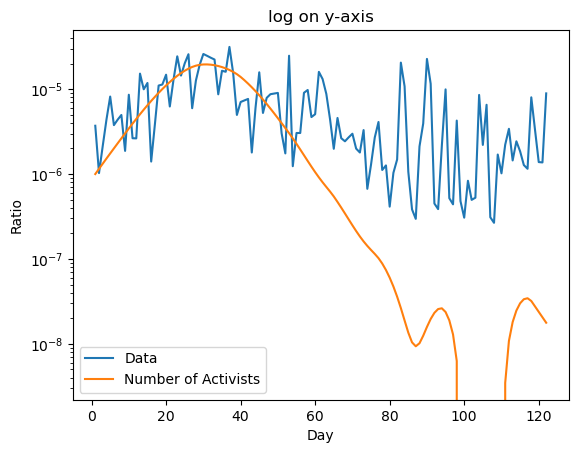

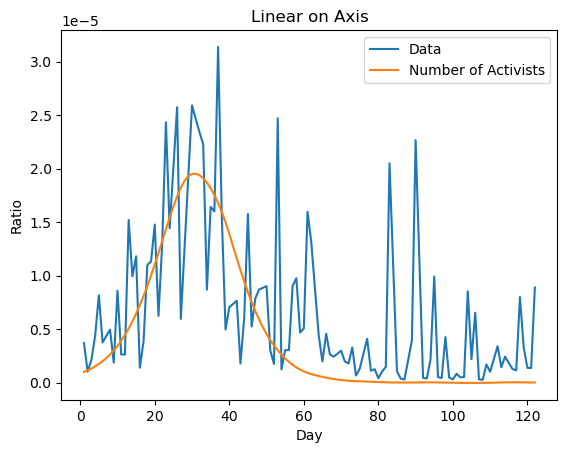

In [38]:
# Minimizing our Model
# Referencing Prob 4 from SIR Lab
data = pd.read_csv("palprot24.csv", index_col=0)
# data = pd.read_csv("smoothpalprot.csv", index_col=0)

mean_size_truth = data["size_mean"].tolist()

x_vals = np.linspace(1, len(data), len(data))

def calculate_error(params):
    beta, gamma = params

    # define our initial parameters
    nation_pop = 3e8
    init_rioters = 300
    init_removals = 0
    # define our riot ode system as specified above
    def ode(t, x):
        return np.array([-beta*x[0]*x[1], beta*x[0]*x[1] - gamma*x[1], gamma*x[1]])
    # define the time parameters (days)
    t0 = 0
    tf = 122
    # define the initial condition
    y0 = np.array([(nation_pop - init_rioters)/nation_pop, init_rioters/nation_pop, init_removals/nation_pop])
    #solve the system
    sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 122))

    #to measure error, we want to compare sol.y[1] (# of activists) with the size_mean data
    model_pred = sol.y[1] * nation_pop
    diff = model_pred - mean_size_truth

    return np.linalg.norm(diff)

#our parameters are beta and gamma
# p0 = (1/10000, 1/20000)
#p0 = (1/2, 1/3)
p0 = (1, 1) #this works the best
#p0 = (0.5, 0.5)
#p0 = (40, 40)

#bounds = [(1e-6, 0.001), (1e-6, 0.001)]
final_p = minimize(calculate_error, p0).x
print(f'final parameters are: {final_p}')

nation_pop = 3e8
init_rioters = 300
init_removals = 0
# define our riot ode system as specified above
def ode(t, x):
    return np.array([-final_p[0]*x[0]*x[1], final_p[0]*x[0]*x[1] - final_p[1]*x[1], final_p[1]*x[1]])
# define the time parameters (days)
t0 = 0
tf = 122
# define the initial condition
y0 = np.array([(nation_pop - init_rioters)/nation_pop, init_rioters/nation_pop, init_removals/nation_pop])
#solve the system
sol = solve_ivp(ode, (t0, tf), y0, t_eval=np.linspace(t0, tf, 122))

plt.semilogy(x_vals, np.array(mean_size_truth)/nation_pop, label='Data')
plt.semilogy(x_vals, sol.y[1], label='Number of Activists')
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.title("log on y-axis")
plt.legend()
plt.show()

plt.plot(x_vals, np.array(mean_size_truth)/nation_pop, label='Data')
plt.plot(x_vals, sol.y[1], label='Number of Activists')
plt.xlabel('Day')
plt.ylabel('Ratio')
plt.title("Linear on Axis")
plt.legend()
plt.show()